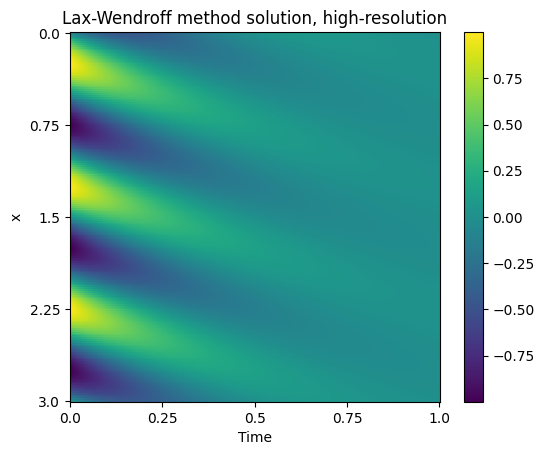

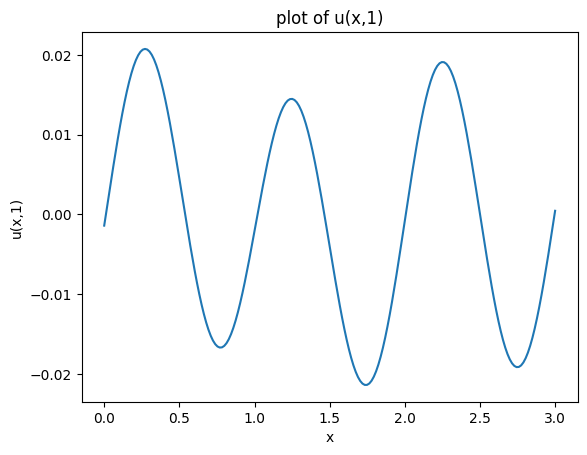

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import RegularGridInterpolator


def lax_wen(Nx, Nt, a, mu):
    u = np.zeros((Nt, Nx))
    u[0, :] = np.sin(2*np.pi*np.linspace(0, 3, Nx))
    u[0, 0] = u[0, -2]
    u[0, 1] = u[0, -1]
    dx = 3/(Nx-1)
    dt = 1/(Nt-1)
    c = a*dt/dx
    d = mu*dt/(dx**2)
    for n in range(Nt-1):
        for i in range(1, Nx-1):
            u[n+1, i] = u[n, i] - 0.5*c*(u[n, i+1] - u[n, i-1]) + \
                (d+c**2/2)*(u[n, i+1] - 2*u[n, i] + u[n, i-1])
        u[n+1, 0] = u[n+1, -2]
        u[n+1, -1] = u[n+1, 1]
    return u


def paint(u: np.array, name: str):
    aspect_ratio = float(u.T.shape[1]) / u.T.shape[0]
    plt.imshow(u.T, cmap='viridis',
               interpolation='nearest', aspect=aspect_ratio)
    plt.colorbar()
    plt.title('Lax-Wendroff method solution, '+name)
    plt.xlabel('Time')
    plt.ylabel('x')
    plt.xticks(np.linspace(0, u.shape[0]-1,
               num=5), np.linspace(0.0, 1.0, num=5))
    plt.yticks(np.linspace(0, u.shape[1]-1,
               num=5), np.linspace(0.0, 3.0, num=5))
    plt.savefig("./HW4_fig/"+name+".png")
    plt.show()


def value(u, Nx, Nt):
    grid_x = np.linspace(0, 3, Nx)
    grid_t = np.linspace(0, 1, Nt)
    interp_func = RegularGridInterpolator((grid_t, grid_x), u)
    return interp_func


def error(u, Nx, Nt, f):
    err = []
    for x in range(Nx):
        for t in range(0, Nt, 100):
            X = x*3.0/(Nx-1)
            T = t*1.0/(Nt-1)
            err.append(abs(f([T, X])-u[t, x]))
    return sum(err)/len(err)


nx = 200
nt = 2000
u_hd = lax_wen(nx, nt, 1, 0.1)
paint(u_hd, "high-resolution")
# print(u1)
x = np.linspace(0.0, 3.0, num=nx)
plt.plot(x, u_hd[nt-1, :])
plt.title('plot of u(x,1)')
plt.xlabel('x')
plt.ylabel('u(x,1)')
plt.show()
# high resolution
f_hd = value(u_hd, nx, nt)

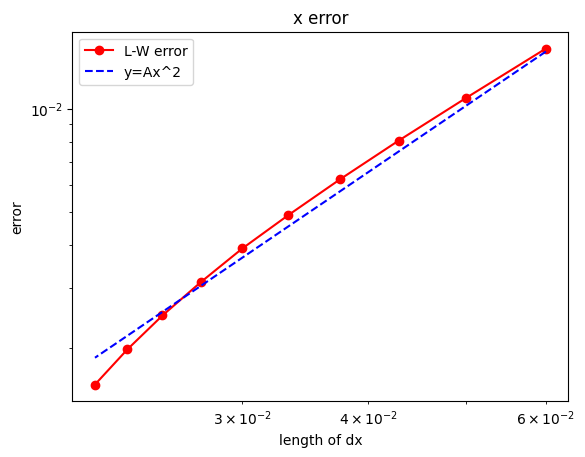

In [42]:
# test x order
x_list = list(range(50, 150, 10))
err_x = []
for nnx in x_list:
    u = lax_wen(nnx, 2000, 1, 0.1)
    err_x.append(error(u, nnx, 2000, f_hd))
    # print(nnx)
dx_list = np.array([3/i for i in x_list])
plt.loglog(dx_list, np.array(err_x), "-ro",label="L-W error")
dx_reference = dx_list**2*np.exp(-3.2)
plt.loglog(dx_list, 100*dx_reference, "b--",label="y=Ax^2")
plt.title('x error')
plt.xlabel('length of dx')
plt.ylabel('error')
plt.legend()
plt.show()

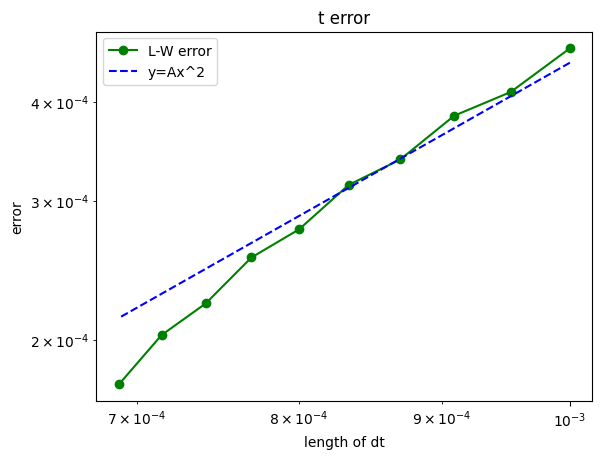

In [43]:
# test x order
t_list = list(range(1000, 1500, 50))
err_t = []
for nnt in t_list:
    u = lax_wen(200, nnt, 1, 0.1)
    err_t.append(error(u, 200, nnt, f_hd))
    # print(nnx)
dt_list = np.array([1/i for i in t_list])
plt.loglog(dt_list, np.array(err_t), "-go",label="L-W error")
dt_reference = dt_list**2*np.exp(1.5)
plt.loglog(dt_list, 100*dt_reference, "b--",label="y=Ax^2")
plt.title('t error')
plt.xlabel('length of dt')
plt.ylabel('error')
plt.legend()
plt.show()

[800, 850, 900, 950, 1000, 1050, 1100, 1150, 1200, 1250, 1300, 1350, 1400, 1450]
[109, 113, 116, 119, 122, 125, 128, 131, 134, 137, 140, 142, 145, 147]


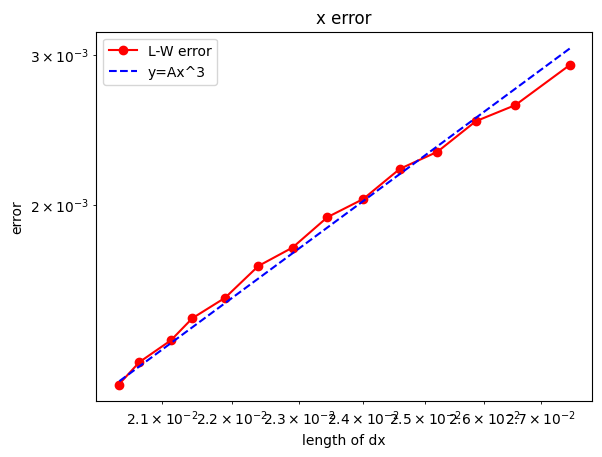

In [44]:
nt_list=list(range(800, 1500, 50))
nx_list=[round(np.sqrt(9*i**2/(1+0.6*i))) for i in nt_list]
print(nt_list)
print(nx_list)

err_x = []
for i in range(len(nt_list)):
    nnx=nx_list[i]
    nnt=nt_list[i]
    u = lax_wen(nnx, nnt, 1, 0.1)
    err_x.append(error(u, nnx, nnt, f_hd))
    # print(nnx)
dx_list = np.array([3/i for i in nx_list])
dt_list = np.array([1/i for i in nt_list])
plt.loglog(dx_list, np.array(err_x), "-ro",label="L-W error")
dx_reference = dx_list**3*np.exp(0.38)
plt.loglog(dx_list, 100*dx_reference, "b--",label="y=Ax^3")
plt.title('x error')
plt.xlabel('length of dx')
plt.ylabel('error')
plt.legend()
plt.show()